## Plot comparisons of total column ozone for specific months

Plots from the CCMI simulations.

In [1]:
import iris
import iris.quickplot as qplt
import iris.coord_categorisation
import iris.analysis
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cf_units

In [2]:
# define the locations of the various datasets
# CCMI2022 refD1 ensemble
ensdata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_Amon_UKESM1-StratTrop_refD1_r?i1p1f2_gn_19600101-20190101.nc'
# CCMI1 refC1
ccmidata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_monthly_UMUKCA-UCAM_refC1_r1i1p1_*.nc'
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
# read-in the data

# now lets consider the CCMI1 data, and compare the 2000s with the 1960s
# 10-year files for CCMI1, need to remove differing attributes
inccmi=iris.load(ccmidata,'toz')
attrs=iris.util.equalise_attributes(inccmi)
# concatinate in time
ccmi=inccmi.concatenate_cube()

# 3x ensemble members for CCMI2022
inens=iris.load(ensdata,'toz')

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'toz'
  warnings.warn(
/tmp/ipykernel_1218/3811458652.py:5: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  inccmi=iris.load(ccmidata,'toz')
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'toz'
  warnings.warn(
/tmp/ipykernel_1218/3811458652.py:5: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  inccmi=iris.load(ccmidata,'toz')
/home/ubuntu/miniconda3/lib/pyth

In [4]:
# Let's make climatologies of 1995-2005

# Only want 1995-2005 for a year-2000 climatology
# time constraints for extracting data
pdt1=iris.time.PartialDateTime(year=1995, month=1, day=1)
pdt2=iris.time.PartialDateTime(year=2006, month=1, day=1)
tconstr=iris.Constraint(time=lambda cell: pdt1 <= cell.point < pdt2)

# CCMI1
# add the months to allow for aggregation
iris.coord_categorisation.add_month(ccmi,'time')

# extract the data
ccmi_2000=ccmi.extract(tconstr)

# aggregate by month to produce a climatology
ccmi_clim = ccmi_2000.aggregated_by('month', iris.analysis.MEAN)

# CCMI2022 data is in units of m rather than Dobson units, so will need to convert
duconv=1.0e5

# CCMI2022 ensemble
ens=iris.cube.CubeList()
for cube in inens:
    # convert to DU
    cube.data=cube.data/duconv
    cube.units='DU'
    # add the months to allow for aggregation
    iris.coord_categorisation.add_month(cube,'time')
    # extract the data
    cube_2000=cube.extract(tconstr)
    # aggregate by month to produce a climatology
    cube_clim = cube_2000.aggregated_by('month', iris.analysis.MEAN)
    ens.append(cube_clim)
    
# calculate ensemble mean
s=list(ens[0].data.shape)
s.append(len(ens))
arr=np.zeros(s)
for i in range(len(ens)):
    arr[:,:,:,i]=ens[i].data[:,:,:]
darr=np.mean(arr,axis=3)
ensmean=ens[0].copy()
ensmean.data=darr

In [5]:
# choose a month to plot, e.g. March=2, September=8 (python counts from 0)
imonth=2

# choose a location to plot, -90 is south pole, 90 is north pole
ilat=90.0

In [6]:
# set contour levels for use in plots
clevs=np.arange(180,460,20)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:836

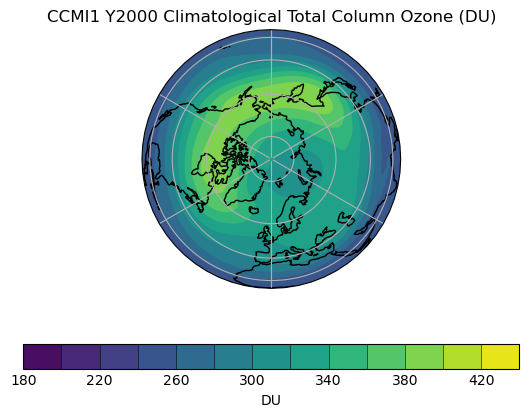

In [7]:
# set the projection
proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=ilat)
ax = plt.axes(projection=proj)
qplt.contourf(ccmi_clim[imonth,:,:], clevs)
plt.gca().coastlines()
ax.gridlines()
plt.title('CCMI1 Y2000 Climatological Total Column Ozone (DU)')
plt.show()

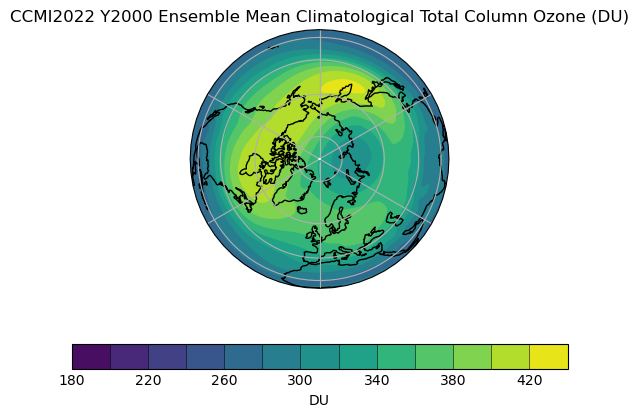

In [8]:
# set the projection
proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=ilat)
ax = plt.axes(projection=proj)
qplt.contourf(ensmean[imonth,:,:], clevs)
plt.gca().coastlines()
ax.gridlines()
plt.title('CCMI2022 Y2000 Ensemble Mean Climatological Total Column Ozone (DU)')
plt.show()

In [9]:
# calculate differences for CCMI2022 ensemble members
ens_abs=iris.cube.CubeList()
ens_pc=iris.cube.CubeList()
for cube in ens:
    # absolute
    diff_abs=cube.copy()
    diff_abs.data=cube.data - ensmean.data
    ens_abs.append(diff_abs)
    # percentage
    diff_pc=cube.copy()
    diff_pc.data=100.0*((cube.data - ensmean.data)/ensmean.data)
    diff_pc.units=cf_units.Unit('%')
    ens_pc.append(diff_pc)

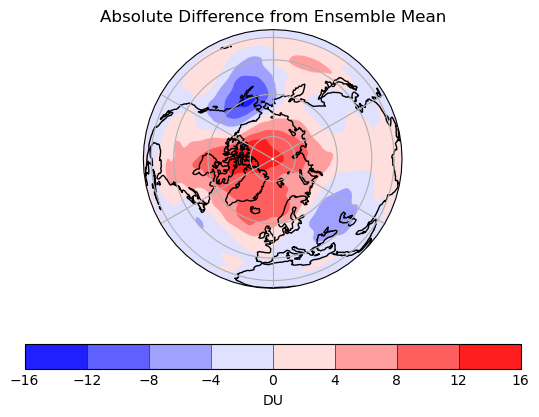

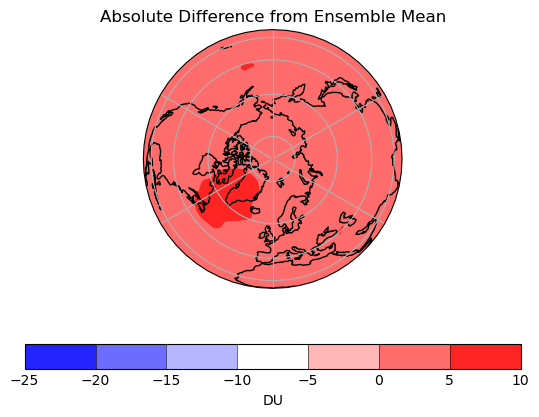

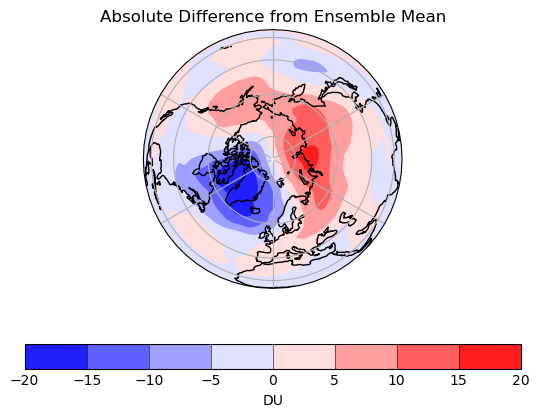

In [10]:
# levels for plotting
# set the projection
for cube in ens_abs:
    proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=ilat)
    ax = plt.axes(projection=proj)
    cplot=qplt.contourf(cube[imonth,:,:], cmap=cm.bwr)
    plt.gca().coastlines()
    ax.gridlines()
    plt.title('Absolute Difference from Ensemble Mean')
    plt.show()

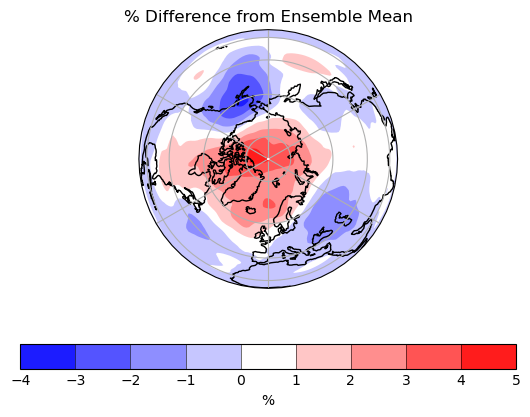

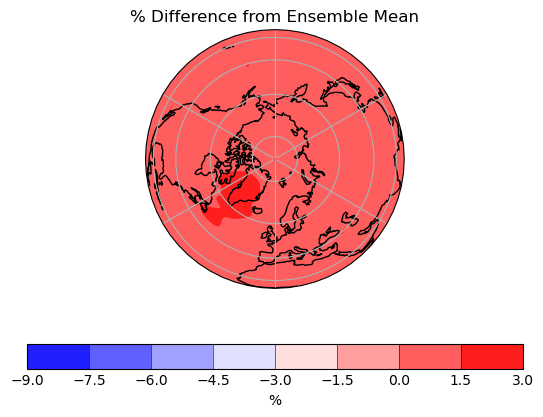

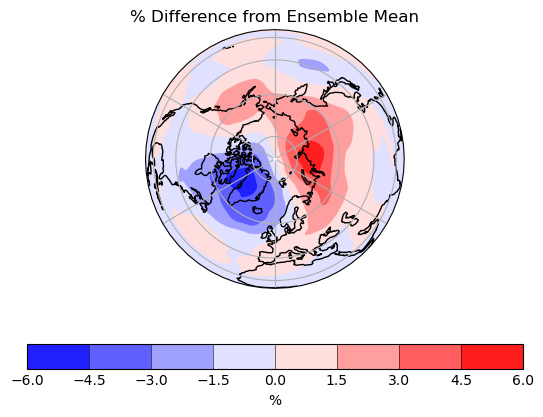

In [11]:
# levels for plotting
# set the projection
for cube in ens_pc:
    proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=ilat)
    ax = plt.axes(projection=proj)
    cplot=qplt.contourf(cube[imonth,:,:], cmap=cm.bwr)
    plt.gca().coastlines()
    ax.gridlines()
    plt.title('% Difference from Ensemble Mean')
    plt.show()